In [2]:
#Importing all the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from dateutil.parser import parse
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import  LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from datetime import datetime
import seaborn as sns

In [3]:
#Reading the loan.csv file
data1 = pd.read_csv('C:/Users/vumamahe/Downloads/loan.csv/loan.csv', low_memory=False)

In [4]:
#Seeing first 5 rows by using head function to understand how data looks like
data1.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#Describing the dataset to know the Mean, S.D., Quartiles of numerical columns
data1.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,8.873790e+05,8.873790e+05,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,8.873750e+05,887379.000000,887350.000000,...,21372.000000,18617.000000,21372.000000,21372.000000,21372.000000,21372.000000,8.171030e+05,21372.000000,21372.000000,21372.000000
mean,3.246513e+07,3.500182e+07,14755.264605,14741.877625,14702.464383,13.246740,436.717127,7.502759e+04,18.157039,0.314442,...,36552.811389,71.535317,1.389060,2.975482,5887.979740,60.831939,3.206862e+04,0.943945,1.537058,1.977307
std,2.282734e+07,2.411335e+07,8435.455601,8429.897657,8442.106732,4.381867,244.186593,6.469830e+04,17.190626,0.862244,...,43103.833619,23.022862,1.520129,2.631886,5284.701239,20.013254,3.749826e+04,1.446872,2.723339,2.874067
min,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.320000,15.670000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-4.000000
25%,9.206643e+06,1.087713e+07,8000.000000,8000.000000,8000.000000,9.990000,260.705000,4.500000e+04,11.910000,0.000000,...,10251.500000,58.600000,0.000000,1.000000,2411.000000,47.700000,1.390000e+04,0.000000,0.000000,0.000000
50%,3.443327e+07,3.709528e+07,13000.000000,13000.000000,13000.000000,12.990000,382.550000,6.500000e+04,17.650000,0.000000,...,24684.500000,74.900000,1.000000,2.000000,4483.000000,61.900000,2.370000e+04,0.000000,0.000000,2.000000
75%,5.490814e+07,5.847135e+07,20000.000000,20000.000000,20000.000000,16.200000,572.600000,9.000000e+04,23.950000,0.000000,...,47858.000000,87.600000,2.000000,4.000000,7771.500000,75.200000,3.980000e+04,1.000000,2.000000,3.000000
max,6.861706e+07,7.354484e+07,35000.000000,35000.000000,35000.000000,28.990000,1445.460000,9.500000e+06,9999.000000,39.000000,...,878459.000000,223.300000,22.000000,43.000000,127305.000000,151.400000,9.999999e+06,17.000000,35.000000,32.000000


In [6]:
#Knowing the data types of all the columns
data1.dtypes

id                               int64
member_id                        int64
loan_amnt                      float64
funded_amnt                    float64
funded_amnt_inv                float64
term                            object
int_rate                       float64
installment                    float64
grade                           object
sub_grade                       object
emp_title                       object
emp_length                      object
home_ownership                  object
annual_inc                     float64
verification_status             object
issue_d                         object
loan_status                     object
pymnt_plan                      object
url                             object
desc                            object
purpose                         object
title                           object
zip_code                        object
addr_state                      object
dti                            float64
delinq_2yrs              

In [7]:
#Finding how many columns are numeric
numeric_features = data1.select_dtypes(include=[np.number])
numeric_features.shape # 51 features are numeric

(887379, 51)

In [8]:
#Finding how many columns are non-numeric
non_numeric_features = data1.select_dtypes(exclude=[np.number])
non_numeric_features.shape # 23 features are non numeric

(887379, 23)

In [9]:
#Examining the data types of non-numeric features
non_numeric_features.dtypes

term                         object
grade                        object
sub_grade                    object
emp_title                    object
emp_length                   object
home_ownership               object
verification_status          object
issue_d                      object
loan_status                  object
pymnt_plan                   object
url                          object
desc                         object
purpose                      object
title                        object
zip_code                     object
addr_state                   object
earliest_cr_line             object
initial_list_status          object
last_pymnt_d                 object
next_pymnt_d                 object
last_credit_pull_d           object
application_type             object
verification_status_joint    object
dtype: object

In [10]:
#All the dtypes are in object form, look at the columns and convert them into
#string if it is a categorical variable and int,float if it is numeric

In [11]:
#Having a look at the non numeric columns
non_numeric_list = non_numeric_features.columns
non_numeric_list

Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'earliest_cr_line', 'initial_list_status', 'last_pymnt_d',
       'next_pymnt_d', 'last_credit_pull_d', 'application_type',
       'verification_status_joint'],
      dtype='object')

In [12]:
#Checking if all the ID's in the data are unique
data1.id.unique()

array([ 1077501,  1077430,  1077175, ..., 36271333, 36490806, 36271262],
      dtype=int64)

In [13]:
#You can see that all the ID values are unique and proper. 
#So there is no need of replacing or cleaning the data for this column

In [14]:
#convert id column into float64
data1.id = data1.id.astype(np.float64)
data1.id.dtypes

dtype('float64')

In [15]:
#convert member_id column into float64
data1.member_id = data1.id.astype(np.float64)
data1.member_id.dtypes

dtype('float64')

In [16]:
data1 = data1[data1.grade.notnull()]

In [17]:
#Checking and examining the term values and seeing how many counts are there for each value
data1.term.value_counts()

 36 months    621125
 60 months    266254
Name: term, dtype: int64

In [18]:
#Checking if there are any null values
data1.term.isnull().sum()

0

In [19]:
#An Extra step that has to be done, if the term has any null values
data1.term = data1.term.fillna('0')

In [20]:
#Encoding dummy variable for the column term
term= pd.get_dummies(data1.term,prefix='term')
term

,term_ 36 months,term_ 60 months
0,1,0
1,0,1
2,1,0
3,1,0
4,0,1
5,1,0
6,0,1
7,1,0
8,0,1
9,0,1


In [21]:
#Adding the dummy variable to the dataset
data1 = pd.concat([data1,term],axis=1)
data1

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,term_ 36 months,term_ 60 months
0,1077501.0,1077501.0,5000.0,5000.0,4975.000000,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
1,1077430.0,1077430.0,2500.0,2500.0,2500.000000,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1
2,1077175.0,1077175.0,2400.0,2400.0,2400.000000,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
3,1076863.0,1076863.0,10000.0,10000.0,10000.000000,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
4,1075358.0,1075358.0,3000.0,3000.0,3000.000000,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1
5,1075269.0,1075269.0,5000.0,5000.0,5000.000000,36 months,7.90,156.46,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
6,1069639.0,1069639.0,7000.0,7000.0,7000.000000,60 months,15.96,170.08,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1
7,1072053.0,1072053.0,3000.0,3000.0,3000.000000,36 months,18.64,109.43,E,E1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
8,1071795.0,1071795.0,5600.0,5600.0,5600.000000,60 months,21.28,152.39,F,F2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1
9,1071570.0,1071570.0,5375.0,5375.0,5350.000000,60 months,12.69,121.45,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1


In [22]:
#Dropping the column term after adding the dummy variable
data1 = data1.drop('term',axis=1)
data1

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,emp_title,...,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,term_ 36 months,term_ 60 months
0,1077501.0,1077501.0,5000.0,5000.0,4975.000000,10.65,162.87,B,B2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
1,1077430.0,1077430.0,2500.0,2500.0,2500.000000,15.27,59.83,C,C4,Ryder,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1
2,1077175.0,1077175.0,2400.0,2400.0,2400.000000,15.96,84.33,C,C5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
3,1076863.0,1076863.0,10000.0,10000.0,10000.000000,13.49,339.31,C,C1,AIR RESOURCES BOARD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
4,1075358.0,1075358.0,3000.0,3000.0,3000.000000,12.69,67.79,B,B5,University Medical Group,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1
5,1075269.0,1075269.0,5000.0,5000.0,5000.000000,7.90,156.46,A,A4,Veolia Transportaton,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
6,1069639.0,1069639.0,7000.0,7000.0,7000.000000,15.96,170.08,C,C5,Southern Star Photography,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1
7,1072053.0,1072053.0,3000.0,3000.0,3000.000000,18.64,109.43,E,E1,MKC Accounting,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
8,1071795.0,1071795.0,5600.0,5600.0,5600.000000,21.28,152.39,F,F2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1
9,1071570.0,1071570.0,5375.0,5375.0,5350.000000,12.69,121.45,B,B5,Starbucks,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1


In [23]:
#Exploring the various different count of interest rates
data1.int_rate.value_counts()

10.99    34624
9.17     25720
15.61    25201
9.99     21553
7.89     20311
13.99    19076
12.69    18783
12.29    18603
12.99    18540
17.57    18001
8.18     17813
13.33    17568
16.99    16464
11.53    16183
11.99    15447
14.65    14768
18.25    11507
8.90     11424
16.55    10955
6.03     10755
16.29    10587
17.86    10461
14.99    10107
7.90     10079
13.98     9803
12.49     9727
5.32      9651
7.26      9438
12.12     9414
14.33     8836
         ...  
20.52        4
14.43        4
23.59        4
17.15        4
16.96        4
20.69        3
12.62        3
18.86        3
14.57        3
14.67        3
16.46        3
17.28        2
22.94        2
16.33        2
17.91        2
17.59        2
21.82        2
13.84        2
17.09        2
16.83        1
22.64        1
17.46        1
17.78        1
24.59        1
17.41        1
17.44        1
17.72        1
24.40        1
18.72        1
14.28        1
Name: int_rate, Length: 542, dtype: int64

In [24]:
data1.grade.value_counts() # 7 unique values

B    254535
C    245860
A    148202
D    139542
E     70705
F     23046
G      5489
Name: grade, dtype: int64

In [25]:
data1.grade.isnull().sum()

0

In [26]:
data1.sub_grade.nunique() # 35

35

In [27]:
data1.emp_title.isnull().sum()

51462

In [28]:
#Replacing the null values in Employee titles with 'Other' value
data1.emp_title = data1.emp_title.fillna('other')

In [29]:
data1.emp_title.isnull().sum()

0

In [30]:
#Data Cleaning
dic = {'years':'','year':'','10+ years':'10','< 1 year':'1','n/a':'0','10+':'10','< 1':'1'}
#Function to replace the garbage values with correct values
def empLength(x):
    for k,v in dic.items():
        x = x.replace(k,v)
    return x
#Converting the data type of Emp Length to string
data1.emp_length = data1.emp_length.astype(str)
#Applying the function empLength to the column emp_length
data1.emp_length = data1.emp_length.apply(empLength)
#using a Lamba function for x, to replace the garbage string present 
#with the correct string else the same correct string will remain
data1.emp_length = data1.emp_length.apply(lambda x:  x.replace('s','') if 's' in x else x)
#Finding the unique values present in the column emp_length
data1.emp_length.unique()
#Finding if there's any null values in the column
data1.emp_length.isnull().sum()
#Converting it back to float data type
data1.emp_length = data1.emp_length.astype(np.float32)

In [31]:
data1.home_ownership.unique()
home_ownership= pd.get_dummies(data1.home_ownership,prefix='home_ownership')
data1 = pd.concat([data1,home_ownership],axis=1)
data1 = data1.drop('home_ownership',axis=1)

In [32]:
verification_status= pd.get_dummies(data1.verification_status,prefix='verification_status')
data1 = pd.concat([data1,verification_status],axis=1)
data1 = data1.drop('verification_status',axis=1)

In [33]:
data1.issue_d.isnull().sum()

0

In [34]:
data1.issue_d.head()

0    Dec-2011
1    Dec-2011
2    Dec-2011
3    Dec-2011
4    Dec-2011
Name: issue_d, dtype: object

In [35]:
data1.issue_d = data1.issue_d.apply(lambda x: parse(x))

In [36]:
data1.issue_d.head()

0   2011-12-21
1   2011-12-21
2   2011-12-21
3   2011-12-21
4   2011-12-21
Name: issue_d, dtype: datetime64[ns]

In [37]:
data1.loan_status.unique()

data1.pymnt_plan.unique()

data1.title.nunique()

data1.revol_util.unique()

data1.initial_list_status.unique() 

data1.last_pymnt_d.isnull().sum()
data1.last_pymnt_d.nunique()
data1.last_pymnt_d = data1.last_pymnt_d.fillna(method='ffill')
data1.last_pymnt_d = data1.last_pymnt_d.apply(lambda x: parse(x))

data1.last_credit_pull_d.isnull().sum()
data1.last_credit_pull_d.nunique()
data1.last_credit_pull_d = data1.last_credit_pull_d.fillna(method='ffill')
data1.last_credit_pull_d = data1.last_credit_pull_d.apply(lambda x: parse(x))

In [38]:
y = data1.loc[:,['grade']].values

In [39]:
y

array([['B'],
       ['C'],
       ['C'],
       ...,
       ['D'],
       ['E'],
       ['B']], dtype=object)

In [40]:
data1.int_rate.head()

0    10.65
1    15.27
2    15.96
3    13.49
4    12.69
Name: int_rate, dtype: float64

In [41]:
data1.int_rate = data1.int_rate.astype(str)
data1.int_rate = data1.int_rate.apply(lambda x: x.replace('%','') if '%' in x else x)
data1.int_rate = data1.int_rate.astype(np.float32)
data1.int_rate = data1.int_rate.apply(lambda x: x/100)

In [42]:
data1.int_rate.head()

0    0.1065
1    0.1527
2    0.1596
3    0.1349
4    0.1269
Name: int_rate, dtype: float64

In [43]:
data1.loan_status.unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off', 'Issued'],
      dtype=object)

In [44]:
# predicting grade column
# Taking out four columns from the dataset
X = data1.loc[:,['loan_amnt','funded_amnt','funded_amnt_inv','int_rate']]

In [45]:
#Defining the training and test data split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [46]:
#fit() : used for generating learning model parameters from training data
#transform() : parameters generated from fit() method,applied upon model to generate transformed data set.
#fit_transform() : combination of fit() and transform() api on same data set
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [47]:
#Random Forest
# n_estimators : integer, optional (default=10) The number of trees in the forest.
#criterion : string, The function to measure the quality of a split. “gini”:Gini impurity “entropy” :information gain

model = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
model.fit(X_train,y_train)

C:\Users\vumamahe\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [48]:
y_pred_grade = model.predict(X_test)
y_pred_grade

array(['D', 'B', 'A', ..., 'A', 'C', 'D'], dtype=object)

In [49]:
cm_random_grade = confusion_matrix(y_test,y_pred_grade)
cm_random_grade

array([[37076,    62,     0,     0,     0,     0,     0],
       [   77, 61408,  2023,     8,     0,     0,     0],
       [    1,  1255, 58018,  2160,     6,     0,     0],
       [    2,    22,  1002, 32140,  1723,     5,     1],
       [    1,     1,    24,  1194, 16108,   315,     3],
       [    0,     0,     2,    56,   339,  5370,    52],
       [    0,     0,     2,     8,    48,    92,  1241]], dtype=int64)

In [50]:
#Naive Bayes

model_naive = GaussianNB()
model_naive.fit(X_train,y_train)
y_pred_naive_grade = model_naive.predict(X_test)
y_pred_naive_grade

C:\Users\vumamahe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array(['C', 'B', 'A', ..., 'A', 'C', 'D'], dtype='<U1')

In [51]:
cm_naive_grade= confusion_matrix(y_test,y_pred_naive_grade)
cm_naive_grade

array([[33873,  3265,     0,     0,     0,     0,     0],
       [ 5374, 49789,  8353,     0,     0,     0,     0],
       [   11,  6870, 49744,  4815,     0,     0,     0],
       [    9,    23,  6491, 25192,  3180,     0,     0],
       [    5,     0,   122,  4913, 11826,   780,     0],
       [    0,     0,    15,   145,   740,  4914,     5],
       [    0,     0,     0,    36,    69,   930,   356]], dtype=int64)

In [52]:
#Decision Tree

model_DT = DecisionTreeClassifier()
model_DT.fit(X_train,y_train)

y_pred_DT_grade = model_DT.predict(X_test)
y_pred_DT_grade

array(['D', 'B', 'A', ..., 'A', 'C', 'D'], dtype=object)

In [53]:
cm_DT_grade = confusion_matrix(y_test,y_pred_DT_grade)
cm_DT_grade

array([[37084,    54,     0,     0,     0,     0,     0],
       [   65, 61452,  1992,     7,     0,     0,     0],
       [    0,  1296, 58100,  2036,     7,     1,     0],
       [    0,    27,  1056, 32318,  1488,     5,     1],
       [    0,     2,     5,  1176, 16202,   260,     1],
       [    0,     0,     2,    10,   264,  5509,    34],
       [    0,     0,     0,     6,     4,    55,  1326]], dtype=int64)

In [54]:
#********************Predicting Loan Status*********************#
data1.isnull().sum()

cols = data1.select_dtypes(include=[np.number])

cols_drop_nan = cols.dropna(axis=1)

cols_filled_mean = cols.fillna(cols.mean())

Text(0.5,1,'Box Plot for Loan Amount')

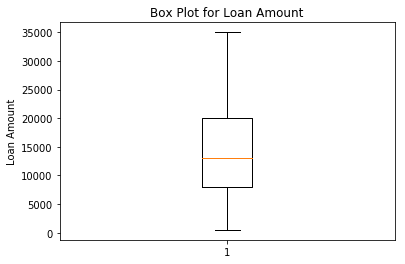

In [55]:
#######################  visualization ################################
cols_drop_nan.columns

######plotting box plot#######
plt.figure()
plt.boxplot(cols_drop_nan.loan_amnt)
plt.ylabel('Loan Amount')
plt.title('Box Plot for Loan Amount')

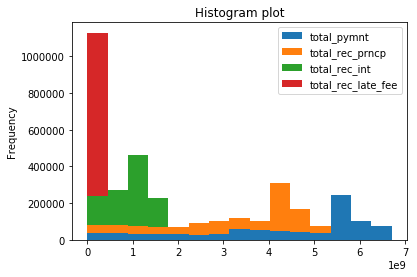

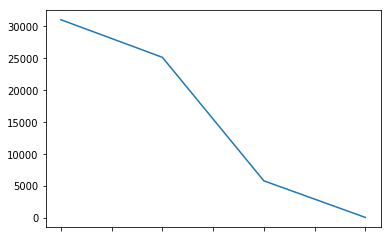

In [56]:
a = cols[['total_pymnt','total_rec_prncp','total_rec_int','total_rec_late_fee']]
a.index = data1['last_pymnt_d']

a = a.cumsum()
a.plot.hist(stacked=True, bins=15,title='Histogram plot')
plt.figure()
a.iloc[5].plot()

C:\Users\vumamahe\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  This is separate from the ipykernel package so we can avoid doing imports until


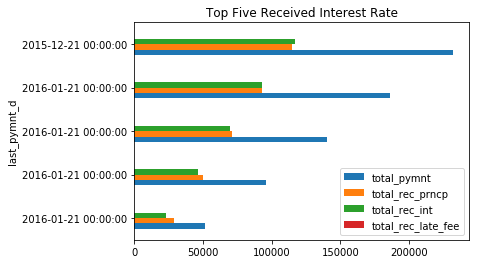

In [57]:
#### plotting top five received interested rate#####
def top_five(df,n=5,column='total_rec_int'):
    return df.sort_index(by=column)[-n:]


b = top_five(data1)
b.index=b['last_pymnt_d']
b = b[['total_pymnt','total_rec_prncp','total_rec_int','total_rec_late_fee']]
b = b.cumsum()
b.plot(kind='barh',title='Top Five Received Interest Rate')

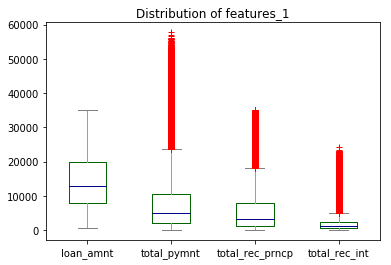

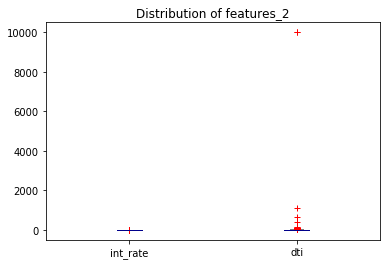

In [58]:
####Distribution###

cols_box1=cols_drop_nan[['loan_amnt','total_pymnt','total_rec_prncp','total_rec_int']]
cols_box2=cols_drop_nan[['int_rate','dti']]
color = dict(boxes='DarkGreen', whiskers='DarkOrange',medians='DarkBlue', caps='Gray')

cols_box1.plot.box(color=color, sym='r+',title = 'Distribution of features_1')
cols_box2.plot.box(color=color, sym='r+',title = 'Distribution of features_2')

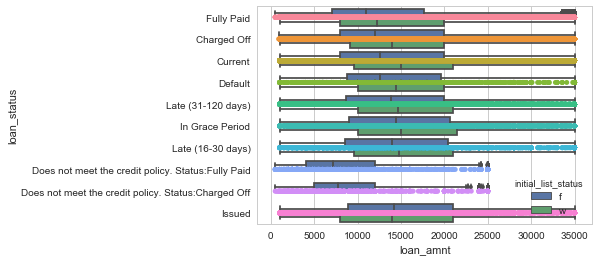

In [59]:
###### area plot ####
sns.set(style="whitegrid", color_codes=True)
sns.stripplot(x="loan_amnt", y="loan_status", data=data1)
sns.boxplot(x="loan_amnt", y="loan_status", hue='initial_list_status',data=data1)

In [60]:
#@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ Logistic Regression @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@#
X_1 = data1.loc[:,cols_drop_nan.columns].values
y_lS = data1.loc[:,['loan_status']].values

X_train_2,X_test_2,y_train_2,y_test_2 = train_test_split(X_1,y_lS,test_size=0.25,random_state=42)

sc2 = StandardScaler()
X_train_2 = sc2.fit_transform(X_train_2)
X_test_2 = sc2.transform(X_test_2)

In [61]:
model_logistic = LogisticRegression()
model_logistic.fit(X_train_2,y_train_2)
y_pred_logistic = model_logistic.predict(X_test_2)

C:\Users\vumamahe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [62]:
cm_logistic = confusion_matrix(y_test_2,y_pred_logistic)
cm_logistic
cm_logistic.shape

(10, 10)

In [63]:
report_logistic = metrics.classification_report(y_test_2,y_pred_logistic)
report_logistic

C:\Users\vumamahe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


'                                                     precision    recall  f1-score   support\n\n                                        Charged Off       0.98      0.97      0.98     11292\n                                            Current       0.95      1.00      0.97    150013\n                                            Default       0.00      0.00      0.00       328\nDoes not meet the credit policy. Status:Charged Off       0.47      0.10      0.17       191\n Does not meet the credit policy. Status:Fully Paid       0.46      0.06      0.10       508\n                                         Fully Paid       0.98      1.00      0.99     52226\n                                    In Grace Period       0.06      0.00      0.00      1538\n                                             Issued       0.00      0.00      0.00      2154\n                                  Late (16-30 days)       0.00      0.00      0.00       637\n                                 Late (31-120 days)      

In [64]:
#@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ Decision Tree @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@#

model_Decision = DecisionTreeClassifier()
model_Decision.fit(X_train_2,y_train_2)

y_pred_Decision = model_Decision.predict(X_test_2)
y_pred_Decision

array(['Fully Paid', 'Current', 'Fully Paid', ..., 'Current',
       'Charged Off', 'Current'], dtype=object)

In [65]:
cm_Decision = confusion_matrix(y_test_2,y_pred_Decision)
cm_Decision

array([[ 11089,      0,      0,     86,      9,    108,      0,      0,
             0,      0],
       [     0, 146008,    117,      0,      0,      8,   1526,    705,
           468,   1181],
       [     0,     83,     72,      0,      0,      0,     12,      1,
             6,    154],
       [   109,      0,      0,     73,      4,      5,      0,      0,
             0,      0],
       [     4,      0,      0,      6,    197,    301,      0,      0,
             0,      0],
       [   103,     15,      1,      8,    344,  51747,      7,      1,
             0,      0],
       [     0,   1315,      3,      0,      0,      2,     80,     15,
            35,     88],
       [     0,    609,      0,      0,      0,      0,     22,   1519,
             1,      3],
       [     0,    497,      3,      0,      0,      0,     37,      5,
            22,     73],
       [     0,   1280,    110,      0,      0,      2,    147,      1,
            97,   1321]], dtype=int64)

In [66]:
report_Decision = metrics.classification_report(y_test_2,y_pred_Decision)
report_Decision

'                                                     precision    recall  f1-score   support\n\n                                        Charged Off       0.98      0.98      0.98     11292\n                                            Current       0.97      0.97      0.97    150013\n                                            Default       0.24      0.22      0.23       328\nDoes not meet the credit policy. Status:Charged Off       0.42      0.38      0.40       191\n Does not meet the credit policy. Status:Fully Paid       0.36      0.39      0.37       508\n                                         Fully Paid       0.99      0.99      0.99     52226\n                                    In Grace Period       0.04      0.05      0.05      1538\n                                             Issued       0.68      0.71      0.69      2154\n                                  Late (16-30 days)       0.03      0.03      0.03       637\n                                 Late (31-120 days)      

In [67]:
#@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ Naive Bayes @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@#

model_naive = GaussianNB()
model_naive.fit(X_train_2,y_train_2)

y_pred_naive = model_naive.predict(X_test_2)
y_pred_naive

C:\Users\vumamahe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array(['Fully Paid', 'Late (31-120 days)', 'Fully Paid', ...,
       'Late (31-120 days)', 'Late (31-120 days)', 'In Grace Period'],
      dtype='<U51')

In [68]:
cm_naive = confusion_matrix(y_test_2,y_pred_naive)
cm_naive

array([[  5754,      2,    199,    342,    194,     31,    205,      9,
            11,   4545],
       [     0,    101,    886,      0,      0,      7,  40283,   2234,
           113, 106389],
       [     0,      0,      6,      0,      0,      0,     25,      4,
             0,    293],
       [    34,      0,      0,     89,     66,      0,      0,      0,
             0,      2],
       [     0,      0,      0,      0,    481,     21,      0,      0,
             0,      6],
       [     0,      0,      0,      0,   5552,  33224,   2480,      2,
          3999,   6969],
       [     0,      0,     13,      0,      0,      1,    255,     50,
             6,   1213],
       [     0,      0,      0,      0,      0,      0,      1,   2152,
             1,      0],
       [     0,      0,      4,      0,      0,      0,    100,     13,
             3,    517],
       [     0,      1,     51,      0,      0,      1,    364,     32,
            12,   2497]], dtype=int64)

In [69]:
report_naive = metrics.classification_report(y_test_2,y_pred_naive)
report_naive

'                                                     precision    recall  f1-score   support\n\n                                        Charged Off       0.99      0.51      0.67     11292\n                                            Current       0.97      0.00      0.00    150013\n                                            Default       0.01      0.02      0.01       328\nDoes not meet the credit policy. Status:Charged Off       0.21      0.47      0.29       191\n Does not meet the credit policy. Status:Fully Paid       0.08      0.95      0.14       508\n                                         Fully Paid       1.00      0.64      0.78     52226\n                                    In Grace Period       0.01      0.17      0.01      1538\n                                             Issued       0.48      1.00      0.65      2154\n                                  Late (16-30 days)       0.00      0.00      0.00       637\n                                 Late (31-120 days)      

In [70]:
#@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@  KNN  @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@#
model_KNN = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)

In [71]:
model_KNN.fit(X_train_2,y_train_2)

C:\Users\vumamahe\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [72]:
y_pred_KNN = model_KNN.predict(X_test_2)
y_pred_KNN

array(['Fully Paid', 'Current', 'Fully Paid', ..., 'Current',
       'Charged Off', 'Current'], dtype=object)

In [73]:
cm_KNN = confusion_matrix(y_test_2,y_pred_KNN)
cm_KNN

array([[ 10176,    667,      1,     19,     12,    406,      1,      0,
             1,      9],
       [    65, 148238,      2,      1,      3,   1419,     23,    134,
             5,    123],
       [     2,    310,      0,      0,      0,      2,      2,      0,
             0,     12],
       [   120,     13,      0,     25,      5,     28,      0,      0,
             0,      0],
       [    14,     24,      0,      3,     67,    399,      0,      0,
             0,      1],
       [    73,    990,      0,      3,     60,  51094,      0,      0,
             0,      6],
       [    17,   1468,      0,      0,      0,     29,      5,      1,
             0,     18],
       [     0,   2018,      0,      0,      0,      1,      0,    135,
             0,      0],
       [     3,    612,      0,      0,      0,      6,      1,      0,
             0,     15],
       [    20,   2824,      2,      0,      0,     40,      8,      1,
             0,     63]], dtype=int64)

In [74]:
report_KNN = metrics.classification_report(y_test_2,y_pred_KNN)
report_KNN

'                                                     precision    recall  f1-score   support\n\n                                        Charged Off       0.97      0.90      0.93     11292\n                                            Current       0.94      0.99      0.97    150013\n                                            Default       0.00      0.00      0.00       328\nDoes not meet the credit policy. Status:Charged Off       0.49      0.13      0.21       191\n Does not meet the credit policy. Status:Fully Paid       0.46      0.13      0.20       508\n                                         Fully Paid       0.96      0.98      0.97     52226\n                                    In Grace Period       0.12      0.00      0.01      1538\n                                             Issued       0.50      0.06      0.11      2154\n                                  Late (16-30 days)       0.00      0.00      0.00       637\n                                 Late (31-120 days)      

In [76]:
#@@@@@@@@@@@@@@@@@@@@@@@@@@@ Apllying k-fold Cross Validation @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@#
y_train_2 = y_train_2.reshape(665534,)
accuracies_Decision = cross_val_score(estimator = model_Decision, X = X_train_2, y = y_train_2, cv = 3,n_jobs=-1)
accuracies_Decision.mean()
accuracies_Decision.std()

0.0002997093848767133

In [77]:
accuracies_logistic = cross_val_score(estimator = model_logistic, X = X_train_2, y = y_train_2, cv = 3,n_jobs=-1)
accuracies_logistic.mean()
accuracies_logistic.std()

0.0002413737892877002

In [78]:
accuracies_Naive = cross_val_score(estimator = model_naive, X = X_train_2, y = y_train_2, cv = 3,n_jobs=-1)
accuracies_Naive.mean()
accuracies_Naive.std()

0.031880909736948675

In [79]:
accuracies_KNN= cross_val_score(estimator = model_KNN, X = X_train_2, y = y_train_2, cv = 3,n_jobs=-1)
accuracies_KNN.mean()
accuracies_KNN.std()

3.3624257557334464e-05

In [80]:
accuracies_Decision.mean()

0.9547040444471229

In [81]:
accuracies_logistic.mean()

0.9592612871491332

In [82]:
accuracies_Naive.mean()

0.22063525187889432

In [83]:
accuracies_KNN.mean()

0.9444280831710666

In [84]:
#Logistic Regression has the best accuracy here.